In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/raw/Dados.txt', header=None, names=['Data', 'Hora', 'Empuxo', 'Tempo'], sep=';')

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    1197 non-null   object 
 1   Hora    1197 non-null   object 
 2   Empuxo  1197 non-null   float64
 3   Tempo   1197 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 37.5+ KB


(        Data      Hora  Empuxo  Tempo
 0  15/5/2024  16:21:49   0.001      0
 1  15/5/2024  16:21:50   0.001     10
 2  15/5/2024  16:21:50   0.001     20
 3  15/5/2024  16:21:50   0.002     30
 4  15/5/2024  16:21:50   0.002     40,
 None)

{'count': 1197.0,
 'mean': 0.06900417710944025,
 'std': 0.35660353487622093,
 'min': 0.001,
 '25%': 0.019,
 '50%': 0.024,
 '75%': 0.028,
 'max': 4.176}

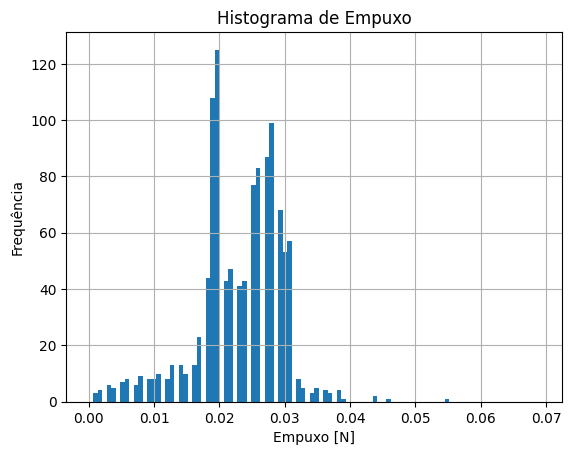

In [14]:
# Histograma para a distribuição dos valores lidos, útil para definir o corte da região de interesse 
plt.figure()
plt.hist(data['Empuxo'], bins=100, range=(0, data['Empuxo'].mean()))
plt.title('Histograma de Empuxo')
plt.xlabel('Empuxo [N]')
plt.ylabel('Frequência')
plt.grid()

data['Empuxo'].describe().to_dict()

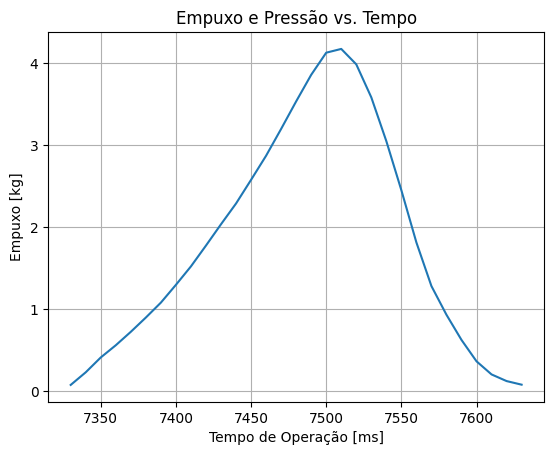

In [6]:
# Obtém os dados apenas de quando o motor está ativo
threshold = data['Empuxo'].mean() # Região onde foi possível notar um segundo pico de concentração no histograma
data_motor_on = data[data['Empuxo'] > threshold]

# Salva os dados limpos no formato Serra Rocketry
data_motor_on.to_csv('data/processed/Data_cleaned.csv', index=False, sep=';')

# Plota os dados de Pressão e Empuxo
fig, ax1 = plt.subplots()

ax1.plot(data_motor_on['Tempo'], data_motor_on['Empuxo'])
ax1.set_xlabel('Tempo de Operação [ms]')
ax1.set_ylabel('Empuxo [kg]')

plt.title('Empuxo e Pressão vs. Tempo')
plt.grid()
plt.show()